# Lesson Polynomial Regression


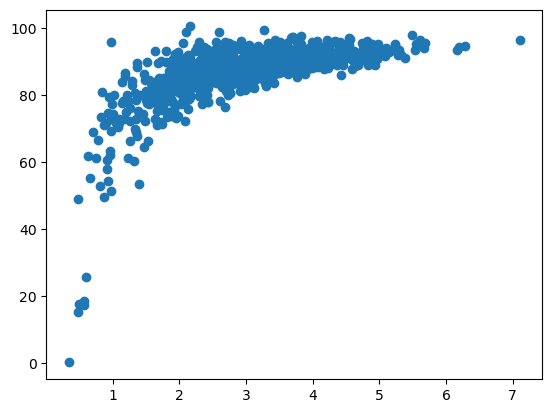

In [9]:
%matplotlib inline
import numpy as np
from pylab import *

#the higher the seed the more the line will go lower and will become more compact
#line below makes it so that the graph or values doesnt change
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
#for linear check comment below
#purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 6.77, 1000)) * 3 

#for polynomial check line below
purchaseAmount = 100 - (pageSpeeds + np.random.normal(30, 10, 1000)) / pageSpeeds\

#create initial scatter plot using data created from pageSpeeds and purchaseAmount
#the more higher the standard deviation the more dispersed the scatterplot
scatter(pageSpeeds, purchaseAmount)

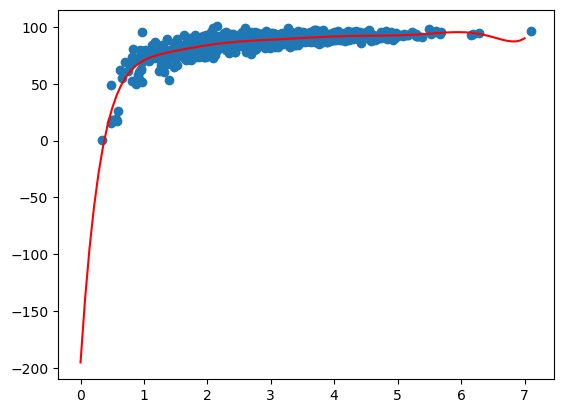

In [10]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 9))

xp = np.linspace(0, 7, 100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.7418635086027034


# Polynomial Regression Activity

Different polynomial orders

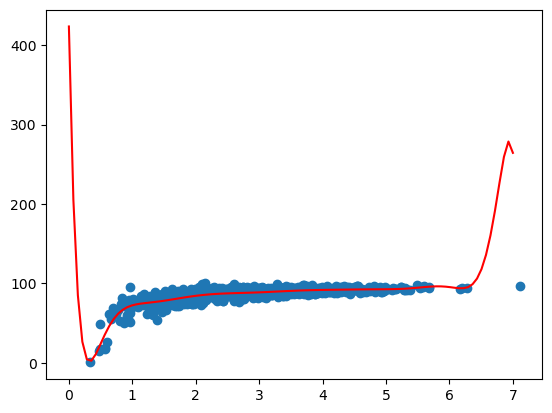

In [18]:
p5 = np.poly1d(np.polyfit(x, y, 15))

xp = np.linspace(0, 7, 100)
plt.scatter(x,y)
plt.plot(xp, p5(xp), c='r')
plt.show()

In [19]:
r2 = r2_score(y, p5(x))

print(r2)

0.7472962038159987


## Conclusion 

Yes I see overfitting mainly in how the "random" data starts getting more uniform and less randomized. When I experimented in increasing the values i noticed that the higher the value the more uniform the data became. Even though the r-score is still above 0.7 this makes the scattered data more uniform and overfitted.

# Lesson Multiple Regression

In [20]:
!pip install xlrd

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_excel('./cars(3).xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<Axes: xlabel='Mileage'>

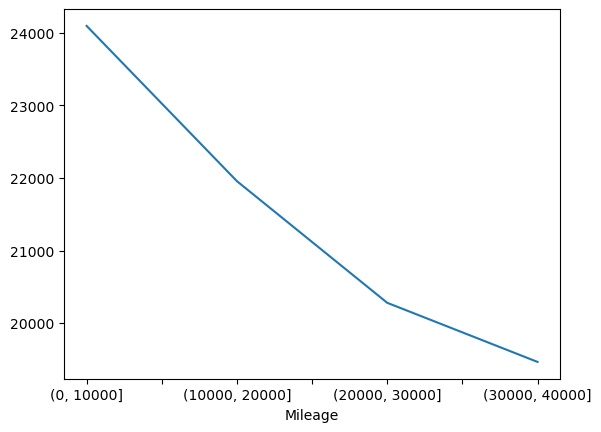

In [22]:
df1=df[['Mileage','Price']] #extract the mileage vs price relationship high milage effect the price

bins =  np.arange(0,50000,10000) #50k miles
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()#mean price and mileage

print(groups.head())
groups['Price'].plot.line()

In [23]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler #scaler to normalize the data
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

#pre-process the data
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit() #feature data

print(est.summary())

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.95e-77
Time:                        12:18:31   Log-Likelihood:                -8356.7
No. Observ

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20720\229383601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


In [24]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

# Multiple Regression Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

In [59]:
scaled = scale.transform([[50000, 4, 2]]) #50k miles, 4 cylinder, 2 doors
scaled = np.insert(scaled[0], 0, 1)
print(scaled)
predicted = est.predict(scaled)
print(predicted)
#predicted 14k Price

[ 1.          3.6829755  -0.91489572 -1.7976593 ]
[14070.11541884]


## Conclusion

The interpretation is that the lower the mileage the more expensive the car will be. Additionally, the more cylinders present the more expensive the car will be. Lastly, if the car has less doors it is more expensive.